In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

##  Introduction

Methods of simulation are based on the production of random variables, originally independent random variables, that are distributed according to a distribution $ f $ that is not necessarily explicitly known (see, for example, Examples 1.1, 1.2, and 1.3). The type of random variable production is formalized below in the definition of a pseudo-random number generator. We first concentrate on the generation of random variables that are uniform on the interval $[0, 1]$, because the uniform distribution provides the basic probabilistic representation of randomness and also because all other distributions require a sequence of uniform variables to be simulated.

###  Uniform Simulation

The logical paradox associated with the generation of "random numbers" is the problem of producing a deterministic sequence of values in $[0, 1]$ which imitates a sequence of independent uniform random variables. Techniques based on the physical imitation of a "random draw" using, for example, the internal clock of the machine have been ruled out. This is because, first, there is no guarantee on the uniform nature of numbers thus produced and, second, there is no reproducibility of such samples.

However, we really do not want to enter here into the philosophical debate on the notion of "random," and whether it is, indeed, possible to "reproduce randomness" (see, for example, Chaitin 1982, 1988). For our purposes, there are methods that use a fully deterministic process to produce a random sequence in the following sense: Having generated $ X_1, X_2, \dots, X_n $, knowledge of $ X_1 $ (or of $ X_1, X_2 $) imparts no discernible knowledge of the value of $ X_{n+1} $ if the transformation function is not available. Of course, given the initial value $ X_0 $ and the transformation function, the sample $ (X_1, X_2, \dots, X_n) $ is always the same.

Thus, the "pseudo-randomness" produced by these techniques is limited since two samples $ (X_1, X_2, \dots, X_n) $ and $ (Y_1, Y_2, \dots, Y_n) $ produced by the algorithm will not be independent, nor identically distributed, nor comparable in any probabilistic sense. This limitation should not be forgotten: The validity of a random number generator is based on a single sample $ (X_1, X_2, \dots, X_n) $ when $ n \to \infty $ and not on replications $ (X_1, X_2, \dots, X_n), (X_2, X_3, \dots, X_{n+1}), (X_1, X_n) $, where $ n $ is fixed and $ k \to \infty $. In fact, the distribution of these $ n $-tuples depends only on the manner in which the initial values $ X_1, X_2, \dots, X_k $ were generated.

With these limitations in mind, we can now introduce the following operational definition, which avoids the difficulties of the philosophical distinction between a deterministic algorithm and the reproduction of a random phenomenon.

### Definition : Uniform Pseudo-Random Number Generator

A uniform pseudo-random number generator is an algorithm which, starting from an initial value $ X_0 $ and a transformation $ D $, produces a sequence $ (U_n) = (D^n(X_0)) $ of values in $ [0, 1] $. For all $ n $, the values $ (U_n) $ reproduce the behavior of an i.i.d. sample $ (V_1, V_2, \dots, V_n) $ of uniform random variables when compared through a usual set of tests.


In [1]:
class UniformPseudoRandomGenerator:
    def __init__(self, seed, a=1664525, c=1013904223, m=2**32):
        """
        Initialize the Uniform Pseudo-Random Number Generator using the LCG method.
        
        Parameters:
            seed (int): Initial value to start the random number generation.
            a (int): Multiplier constant for the LCG. Default is 1664525.
            c (int): Increment constant for the LCG. Default is 1013904223.
            m (int): Modulus for the LCG. Default is 2^32.
        """
        self.seed = seed
        self.a = a
        self.c = c
        self.m = m
        self.state = seed  # Set the initial state

    def next(self):
        """
        Generate the next pseudo-random number in the [0, 1) range using the LCG method.
        
        Returns:
            float: A pseudo-random number between 0 and 1.
        """
        # Update the state using the LCG formula
        self.state = (self.a * self.state + self.c) % self.m
        # Return the pseudo-random number in the [0, 1) range
        return self.state / self.m

    def generate(self, n):
        """
        Generate a sequence of n pseudo-random numbers in the [0, 1) range.
        
        Parameters:
            n (int): Number of random numbers to generate.
        
        Returns:
            list: A list containing n pseudo-random numbers.
        """
        return [self.next() for _ in range(n)]

# Example usage:
if __name__ == "__main__":
    # Initialize the generator with a seed
    prng = UniformPseudoRandomGenerator(seed=12345)

    # Generate 10 pseudo-random numbers
    random_numbers = prng.generate(10)

    # Print the generated random numbers
    print("Generated pseudo-random numbers:")
    for num in random_numbers:
        print(f"{num:.6f}")


Generated pseudo-random numbers:
0.020403
0.016548
0.543156
0.634904
0.910030
0.112462
0.495889
0.548349
0.596100
0.783450


## Uniform Random Number Generation

The validity of the algorithm consists in verifying that the sequence $ U_1, U_2, \dots, U_n $ leads to acceptance of the hypothesis $ H_0 $, where $ U_1, U_2, \dots, U_n $ are independent and identically distributed (i.i.d.) random variables, uniformly distributed on the interval $ [0, 1] $.

The set of tests used to verify the uniformity of these generated random numbers is important. There are classical tests of uniformity, such as the **Kolmogorov-Smirnov test**. Many generators will be deemed adequate under such an examination. Additionally, methods from time series analysis, such as an **ARMA(p, q) model**, can be used to determine the degree of correlation between $ U_i $ and $ (U_{i-1}, U_{i-2}, \dots, U_{i-k}) $.

### Nonparametric Tests and Randomness

Nonparametric tests, like those by **Lehmann (1975)** or **Randles and Wolfe (1979)**, can also be applied on arbitrary decimals of the uniform sequence $ U_1, U_2, \dots, U_n $. **Marsaglia's Diehard tests** are a set of statistical tests specifically designed to evaluate the randomness of pseudo-random number generators.

### Functional Definition of a Random Number Generator

A random number generator is deemed acceptable if it passes a set of statistical tests. These tests determine whether the generated numbers appear uniformly distributed. However, some issues may arise. For example, in applications requiring large numbers of iterations (such as **large deviations theory** or **particle physics**), algorithms that pass standard tests may still have hidden flaws. In such cases, **periodicities** or poor uniformity for the smaller digits may go unnoticed by standard tests. 

### Chaotic Models for Random Number Generation

The deterministic nature of random number generation algorithms may also suggest the use of **chaotic models**. These models are based on dynamic systems of the form:

$$
X_{n+1} = D(X_n)
$$

These systems are sensitive to initial conditions, leading to complex structures. A classic example is the **logistic function**:

$$
D(x) = ax(1 - x)
$$

For some values of $ a \in [3.57, 4.00] $, this function produces chaotic configurations. In particular, when $ a = 4.00 $, the generated sequence $ X_n $ is distributed according to the **arcsine distribution** with the density function:

$$
f(x) = \frac{1}{\pi \sqrt{x(1 - x)}}
$$

### Example of Logistic Function Behavior

The behavior of the sequence generated by the logistic function is illustrated below in **Figure 2.1**. While chaotic systems like the logistic function can generate sequences with properties similar to random numbers, the chaotic nature of the system does not guarantee acceptable probabilistic behavior for the generated numbers.

### Conclusion

Thus, while chaotic models can mimic random number sequences, their suitability depends on various statistical tests. Chaotic systems, such as the logistic function, may generate sequences that have useful properties in certain contexts but require careful analysis to ensure their randomness.


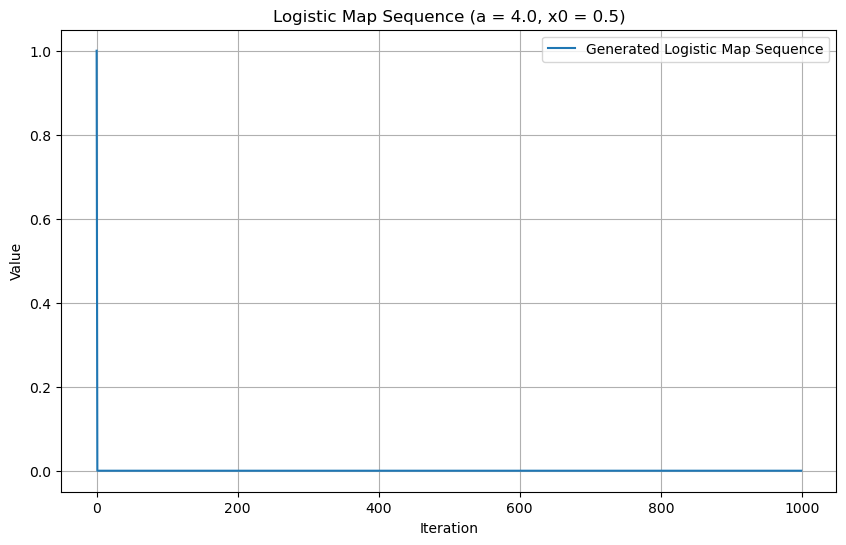

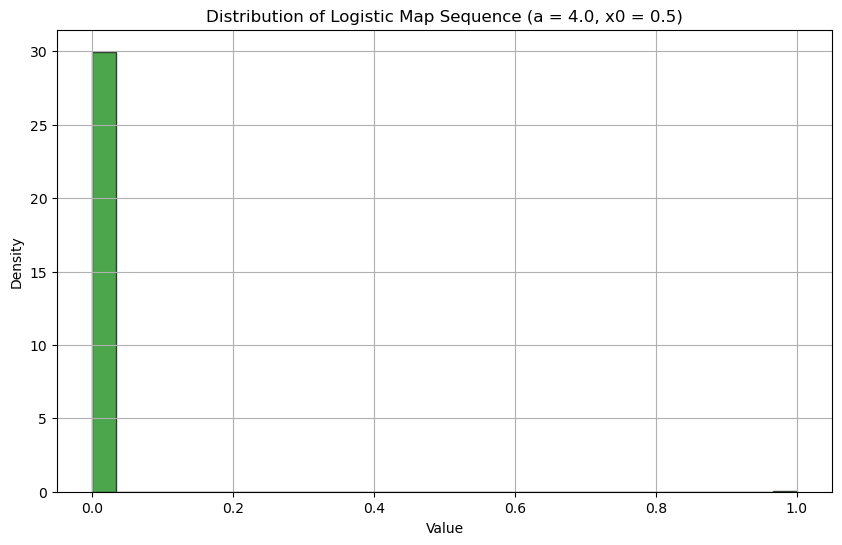

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic function (chaotic map)
def logistic_map(x, a):
    return a * x * (1 - x)

# Generate a sequence of random numbers using the logistic map
def generate_logistic_sequence(a, x0, n):
    sequence = np.zeros(n)
    x = x0
    for i in range(n):
        x = logistic_map(x, a)
        sequence[i] = x
    return sequence

# Parameters for the logistic map
a = 4.00  # Chaotic behavior occurs for a in the range [3.57, 4.00]
x0 = 0.5   # Initial value (seed)
n = 1000   # Length of the sequence

# Generate the sequence
sequence = generate_logistic_sequence(a, x0, n)

# Plotting the generated sequence
plt.figure(figsize=(10, 6))
plt.plot(sequence, label='Generated Logistic Map Sequence')
plt.title(f'Logistic Map Sequence (a = {a}, x0 = {x0})')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

# Plot histogram to visualize distribution
plt.figure(figsize=(10, 6))
plt.hist(sequence, bins=30, density=True, alpha=0.7, color='g', edgecolor='black')
plt.title(f'Distribution of Logistic Map Sequence (a = {a}, x0 = {x0})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


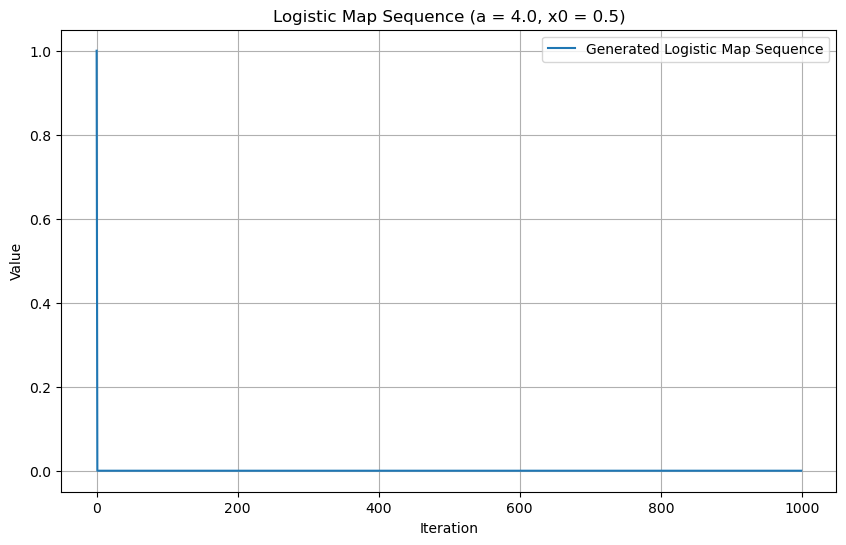

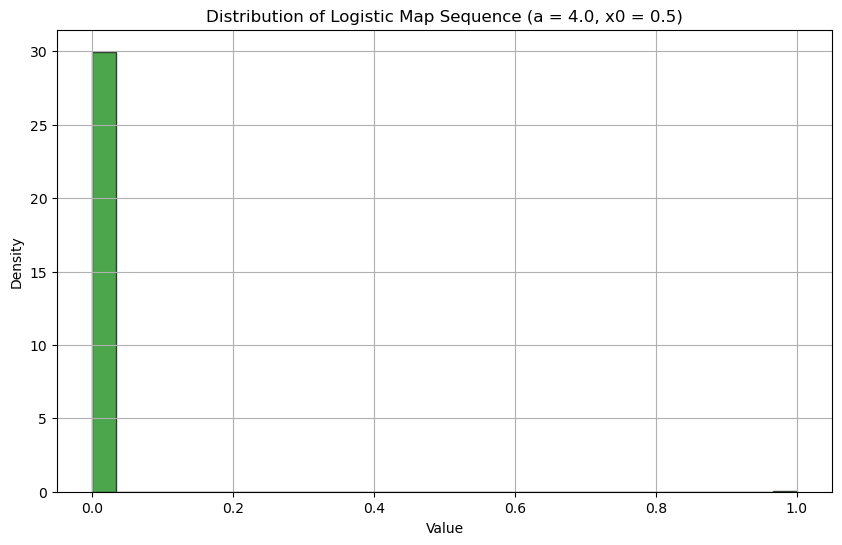

In [3]:
import matplotlib.pyplot as plt

# Logistic function (chaotic map)
def logistic_map(x, a):
    return a * x * (1 - x)

# Generate a sequence of random numbers using the logistic map
def generate_logistic_sequence(a, x0, n):
    sequence = []
    x = x0
    for i in range(n):
        x = logistic_map(x, a)
        sequence.append(x)
    return sequence

# Parameters for the logistic map
a = 4.00  # Chaotic behavior occurs for a in the range [3.57, 4.00]
x0 = 0.5   # Initial value (seed)
n = 1000   # Length of the sequence

# Generate the sequence
sequence = generate_logistic_sequence(a, x0, n)

# Plotting the generated sequence
plt.figure(figsize=(10, 6))
plt.plot(sequence, label='Generated Logistic Map Sequence')
plt.title(f'Logistic Map Sequence (a = {a}, x0 = {x0})')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

# Plot histogram to visualize distribution
plt.figure(figsize=(10, 6))
plt.hist(sequence, bins=30, density=True, alpha=0.7, color='g', edgecolor='black')
plt.title(f'Distribution of Logistic Map Sequence (a = {a}, x0 = {x0})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


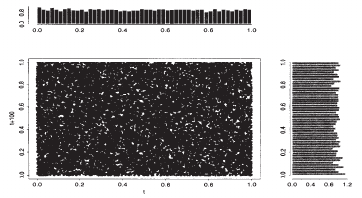

Fig.1. Plot of the sample (n. 3+100) (n = 1, 9899) for the sequence 2n+1= 4x(1-2) and y = F(x), along with the (marginal) histograms of y (on top) and yn+100 (right margin).

### Inverse Transform Method for Generating Random Variables

To describe the inverse transform method in generating random variables from a uniform distribution, the following mathematical explanation applies:

Given a random variable $ X $ that follows a continuous distribution with a known cumulative distribution function (CDF) 4 F_X(x) $, we can generate samples from $ X $ using the inverse transform method. The basic idea is to express $ X $ in terms of the uniform random variable $ U $, which is uniformly distributed on $ [0, 1] $. Specifically, if $ U \sim \text{Uniform}(0, 1) $, then $ X $ can be generated using the following transformation:

$$
X = F_X^{-1}(U)
$$

Here, $ F_X^{-1} $ is the inverse of the CDF of $ X $, and $ U $ is a uniformly distributed random variable.

### Detailed Explanation:
1. **Uniform Distribution**: The uniform random variable $ U $ is generated on the interval $ [0, 1] $. This can be achieved using a pseudo-random number generator as discussed previously.
2. **CDF of $ X $**: The cumulative distribution function $ F_X(x) $ of the random variable $ X $ is known.
3. **Inverse of CDF**: Once the CDF is known, the inverse $ F_X^{-1}(u) $ can be computed for any $ u \in [0, 1] $.
4. **Transformation**: Using $ U \sim \text{Uniform}(0, 1) $, we can generate values of $ X $ by applying the transformation $ X = F_X^{-1}(U) $.

### Example:
If we want to generate random variables from an exponential distribution with rate $ \lambda $, the CDF of the exponential distribution is given by:

$$
F_X(x) = 1 - e^{-\lambda x}
$$

To apply the inverse transform method:
1. Set $ U \sim \text{Uniform}(0, 1) $.
2. Solve for $ X $ by setting $ F_X(X) = U $, i.e.,

$$
1 - e^{-\lambda X} = U
$$

Solving for $ X $:

$$
X = -\frac{1}{\lambda} \ln(1 - U)
$$

Since $ U $ is uniformly distributed, we can generate samples from the exponential distribution using this transformation.

### Summary:
The inverse transform method is a widely used technique for generating random variables from any continuous distribution, as long as the CDF is known and invertible.


### Generalized Inverse and Probability Integral Transform

The notion of a **generalized inverse** function is key to simulating random variables from a given distribution using uniform random variables. The definition and lemma below explain how this is done.

#### Definition : Generalized Inverse

For a non-decreasing function $ F $ on $ \mathbb{R} $, the **generalized inverse** of $ F $, denoted as $ F^{-1} $, is defined as:

$$
F^{-1}(u) = \inf \{ x : F(x) \geq u \}
$$

This generalized inverse provides a way to obtain a random variable from a given cumulative distribution function (CDF) by transforming a uniform random variable.

#### Lemma 2.4: Probability Integral Transform

If $ U \sim \text{Uniform}(0, 1) $, then the random variable $ X = F^{-1}(U) $ has the distribution $ F $, i.e., $ X \sim F $.

**Proof**: For all $ u \in [0, 1] $ and for all $ x \in F([0, 1]) $, the generalized inverse satisfies:

$$
F(F^{-1}(u)) = u \quad \text{and} \quad F^{-1}(F(x)) = x
$$

Thus, the probability that $ F^{-1}(U) \leq x $ is:

$$
P(F^{-1}(U) \leq x) = P(U \leq F(x)) = F(x)
$$

Therefore, the transformation $ F^{-1}(U) $ gives a random variable with the distribution $ F $.

#### Example : Exponential Distribution Generation

Consider generating random variables from an exponential distribution $ \text{Exp}(1) $. The CDF for an exponential distribution is:

$$
F(x) = 1 - e^{-x}
$$

To apply the probability integral transform, solve for $ x $ in $ u = 1 - e^{-x} $:

$$
x = -\log(1 - u)
$$

Therefore, if $ U \sim \text{Uniform}(0, 1) $, the random variable $ X = -\log(U) $ has the exponential distribution $ \text{Exp}(1) $.

#### Summary

The generation of uniform random variables is a crucial step in simulation methods for other probability distributions. By using the generalized inverse function, any random variable can be represented as a deterministic transformation of a uniform random variable. This basic representation is widely used in practice for simulating random variables from various distributions.

Note: The choice of the uniform random number generator is critical for the validity of the simulation procedure, as a poor generator can affect the quality of the results.


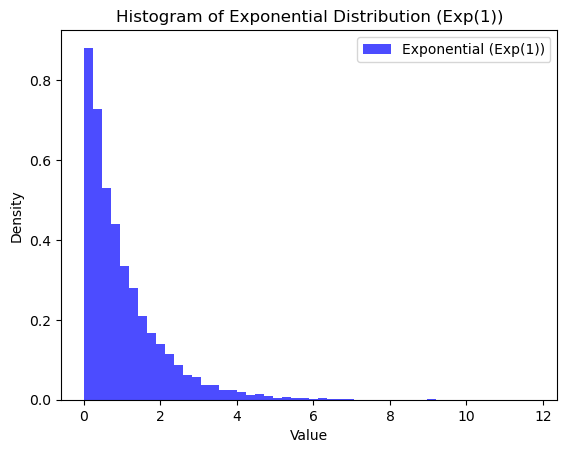

In [4]:
import math
import random
import matplotlib.pyplot as plt

# Function to generate uniform random variable U ~ U(0, 1)
def uniform_random():
    return random.random()

# Function to generate an exponential random variable using the inverse transform method
def exponential_random(rate=1):
    U = uniform_random()
    return -math.log(1 - U) / rate

# Generate a sample of 10000 random variables from an exponential distribution
sample_size = 10000
rate = 1  # for Exp(1) distribution
exp_sample = [exponential_random(rate) for _ in range(sample_size)]

# Plot the histogram of the generated exponential random variables
plt.hist(exp_sample, bins=50, density=True, alpha=0.7, color='blue', label="Exponential (Exp(1))")
plt.title("Histogram of Exponential Distribution (Exp(1))")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(loc='upper right')
plt.show()


###  Alternatives to Monte Carlo Methods

Although computation by Monte Carlo methods can be thought of as an exact calculation (as the order of accuracy is only a function of computation time), it is often viewed as an approximation. Thus, numerical approximation methods can be an alternative to Monte Carlo methods and should also be considered for solving a particular problem.

#### Example 2.6: Normal Probabilities

While the cumulative distribution function (CDF) of the normal distribution cannot be expressed explicitly, there are approximations for the normal CDF and its tail probabilities. One widely used approximation is given by Abramowitz and Stegun (1964), which approximates the CDF of a standard normal distribution:

Let $ P(x) $ be the CDF of the standard normal distribution, and $ \phi(x) $ be the normal density function. The approximation for $ P(x) $ is:

$$
P(x) = 1 - \phi(x) \left[ b_1 t + b_2 t^2 + b_3 t^3 + b_4 t^4 \right]
$$

Where $ t = \frac{1}{1 + p x} $ and $ p = 0.2316419 $, with the following constants:

$$
b_1 = 0.31938, \quad b_2 = 1.78148, \quad b_3 = -1.82125, \quad b_4 = 1.33027
$$

For calculating the upper tail probability of the normal distribution, the approximation is:

$$
P(x > 0) = 1 - \phi(x) \left[ b_1 t_2 + b_2 t_2^2 + b_3 t_2^3 \right]
$$

Where $ t_2 = \log(a_2) $ and constants $ b_1, b_2, $ and $ b_3 $ are used in the approximation of the tail probability.

The approximation gives a good estimate for the CDF of the normal distribution up to an arbitrary precision.

---

### Implementation of Normal CDF Approximation


In [5]:

#```python
import math

def normal_cdf_approximation(x):
    p = 0.2316419
    b1 = 0.31938
    b2 = 1.78148
    b3 = -1.82125
    b4 = 1.33027

    t = 1 / (1 + p * x)
    cdf = 1 - (math.exp(-x**2 / 2) * (b1 * t + b2 * t**2 + b3 * t**3 + b4 * t**4))
    
    return cdf

# Example: Calculate the normal CDF for a value x
x = 1.96
cdf_value = normal_cdf_approximation(x)
print(f"Normal CDF at x = {x}: {cdf_value}")


Normal CDF at x = 1.96: 0.8875765562514685


###  Optimal Algorithms

Devroye (1985) presents a more comprehensive (almost exhaustive!) treatment of the methods of random variable generation than the one presented in this chapter, particularly looking at refinements of existing algorithms to achieve uniformly optimal performances. We strongly recommend that the reader consult this book for a better insight into the implications of this goal in terms of probabilistic and algorithmic complexity.

Some refinements of the simulation techniques introduced in this chapter will be explored in Chapter 4, where we consider ways to accelerate Monte Carlo methods. At this point, we note that the concepts of "optimal" and "efficient" algorithms are particularly difficult to formalize. We can naively compare two algorithms, say [B1] and [B2], in terms of time of computation, for instance, through the average generation time of one observation. However, such a comparison depends on many subjective factors like:

- The quality of the programming.
- The particular programming language used to implement the method.
- The specific machine on which the program runs.

More importantly, this comparison does not take into account the conception, programming (and debugging) times, nor does it incorporate the specific use of the sample produced, partly because a quantification of these factors is generally impossible. For instance, some algorithms have decreasing efficiency when the sample size increases. 

Therefore, reducing the efficiency of a given algorithm to its average computation time is misleading. We only use this type of measurement in settings where [B1] and [B2] are already of the same complexity.

Devroye (1985) also notes that the simplicity of algorithms should be accounted for in their evaluation, since complex algorithms facilitate programming errors and, therefore, may lead to important time losses. In fact, in numerous settings, the time required by a simulation is overwhelmingly dedicated to programming. This is, at least, the case for the authors themselves!

---

#### Simulation in Statistical Programming Packages

Simulation of the standard distributions presented here is accomplished quite efficiently by many statistical programming packages such as:

- **Gauss**
- **Mathematica**
- **Matlab**
- **R**
- **Splus**

When the generators from these general-purpose packages are easily accessible (in terms of programming), it is probably preferable to use such tools instead of implementing your own methods from scratch.


###  General Transformation Methods

When a distribution $ f $ is linked in a relatively simple way to another distribution that is easy to simulate, this relationship can often be exploited to construct an algorithm to simulate variables from $ f $. In this section, we present alternative techniques (to Lemma 2.4) for generating nonuniform random variables. Some of these methods are rather case-specific, and are difficult to generalize as they rely on properties of the distribution under consideration and its relation with other probability distributions.

We begin with an illustration of some distributions that are simple to generate.

#### Example 2.7: Building on Exponential Random Variables

In Example 5, we saw how to generate an exponential random variable starting from a uniform. Now, we illustrate some of the random variables that can be generated starting from an exponential distribution. If the $ X $'s are independent and identically distributed (iid) $ \text{Exp}(1) $ random variables, then:

- $ Y = 2X \sim \text{Exp}(1/2) $
- $ Y = B X \sim \text{Gamma}(a, \theta) $, where $ a \in \mathbb{N}^*, j=1 $
- $ Y = \sum_{i=1}^{n} X_i \sim \text{Gamma}(a, \theta) $
- $ Y = \sum_{i=1}^{n} X_i \sim \text{Beta}(a, b) $, where \( a, b \in \mathbb{N}^* $

Other derivations are possible (see Problem 2.6).

These transformations are quite simple to use and, hence, will often be a favorite. However, there are limits to their usefulness, both in the scope of variables that can be generated and in the efficiency of generation. For example, as we will see, there are more efficient algorithms for Gamma and Beta random variables. Also, we cannot use exponentials to generate Gamma random variables with a non-integer shape parameter. For instance, we cannot generate a \( \text{Gamma}(a, b) \) distribution with a non-integer value of \( a \) using only exponential random variables.



### Example : Normal Variable Generation

If $ r $ and $ \theta $ are the polar coordinates of $ (X_1, X_2) $, then, since the distribution of $ (X_1, X_2) $ is rotation invariant (see Problem 2.7), we have:

$$ r^2 = X_1^2 + X_2^2 \sim \text{Exp}(1/2), \quad \theta \sim \text{Uniform}(0, 2\pi) $$

If $ U_1 $ and $ U_2 $ are iid $ \mathcal{U}(0, 1) $, the variables $ X_1 $ and $ X_2 $ are given by:

$$ X_1 = \sqrt{-2 \log(U_1)} \cos(2\pi U_2), \quad X_2 = \sqrt{-2 \log(U_1)} \sin(2\pi U_2) $$

These are then iid $ \mathcal{N}(0, 1) $ random variables.

#### Algorithm A.3: Box-Muller Algorithm

1. Generate $ U_1, U_2 $ iid $ \mathcal{U}(0, 1) $.
2. Define:

   $$ X_1 = \sqrt{-2 \log(U_1)} \cos(2\pi U_2) $$

   $$ X_2 = \sqrt{-2 \log(U_1)} \sin(2\pi U_2) $$

3. Take $ X_1 $ and $ X_2 $ as two independent draws from $ \mathcal{N}(0, 1) $.

In comparison with algorithms based on the Central Limit Theorem, this algorithm is exact, producing two normal random variables from two uniform random variables. The only drawback (in terms of speed) is the necessity of calculating functions like $ \log $, $ \cos $, and $ \sin $. If this is a concern, Devroye (1985) provides faster alternatives that avoid the use of these functions (see also Problems 2.8 and 2.9).

### Example : Poisson Generation

The Poisson distribution is connected to the exponential distribution through the Poisson process. That is, if $ N \sim \text{Poisson}(\lambda) $ and $ X \sim \text{Exp}(\lambda) $, then for $ i \in \mathbb{N}^* $, we have:

$$ P(N = k) = P(X_1 + \dots + X_k \leq t < X_1 + \dots + X_{k+1}) $$

Thus, the Poisson distribution can be simulated by generating exponential random variables until their sum exceeds $ t $. This method is simple but is really practical only for smaller values of $ \lambda $. On average, the number of exponential variables required is $ \lambda $, and this could be prohibitive for large values of $ \lambda $.

In these settings, Devroye (1981) proposed a method whose computation time is more efficient for large values of $ \lambda $.


In [6]:
import math
import random

def box_muller():
    """Generates two independent standard normal random variables using the Box-Muller transform."""
    # Generate two independent uniform random variables in [0, 1]
    u1 = random.uniform(0, 1)
    u2 = random.uniform(0, 1)
    
    # Apply the Box-Muller transform
    z1 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    z2 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)
    
    return z1, z2

# Example usage
z1, z2 = box_muller()
print(f"Generated normal random variables: z1 = {z1}, z2 = {z2}")


Generated normal random variables: z1 = 2.2673992107155763, z2 = 0.08061609230522973


In [7]:
def poisson(lmbda):
    """
    Simulates a Poisson random variable using the exponential distribution method.
    
    Parameters:
        lmbda (float): The rate parameter of the Poisson distribution.
    
    Returns:
        int: A Poisson random variable.
    """
    sum_exponentials = 0
    count = 0
    
    while sum_exponentials <= 1:
        # Generate an exponential random variable with rate parameter lambda
        u = random.uniform(0, 1)
        exp_var = -math.log(u) / lmbda
        sum_exponentials += exp_var
        count += 1
    
    return count - 1  # The count exceeds the threshold by one

# Example usage
lmbda = 4.5
poisson_var = poisson(lmbda)
print(f"Generated Poisson random variable: {poisson_var}")


Generated Poisson random variable: 6


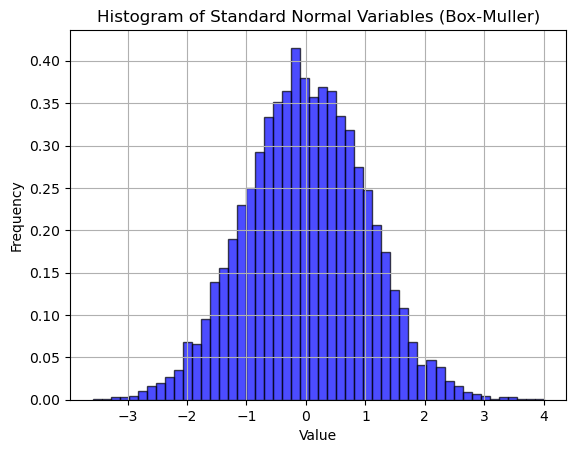

In [8]:
import math
import random
import matplotlib.pyplot as plt

def box_muller():
    """Generates two independent standard normal random variables using the Box-Muller transform."""
    u1 = random.uniform(0, 1)
    u2 = random.uniform(0, 1)
    z1 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    z2 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)
    return z1, z2

# Generate 10,000 samples
box_muller_samples = []
for _ in range(5000):  # Each iteration generates two samples
    z1, z2 = box_muller()
    box_muller_samples.extend([z1, z2])

# Plot the histogram
plt.hist(box_muller_samples, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Standard Normal Variables (Box-Muller)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


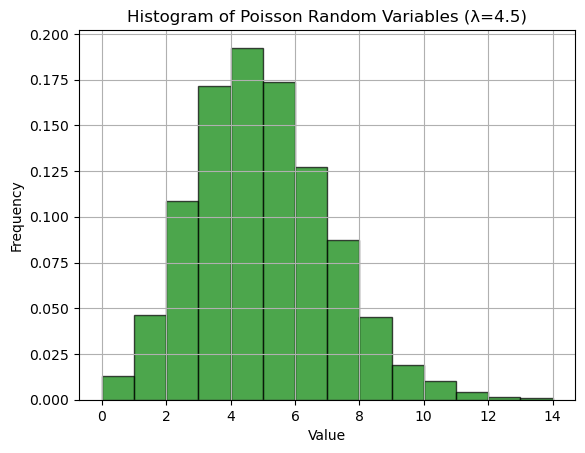

In [9]:
def poisson(lmbda):
    """
    Simulates a Poisson random variable using the exponential distribution method.
    
    Parameters:
        lmbda (float): The rate parameter of the Poisson distribution.
    
    Returns:
        int: A Poisson random variable.
    """
    sum_exponentials = 0
    count = 0
    
    while sum_exponentials <= 1:
        u = random.uniform(0, 1)
        exp_var = -math.log(u) / lmbda
        sum_exponentials += exp_var
        count += 1
    
    return count - 1

# Generate 10,000 samples
lmbda = 4.5
poisson_samples = [poisson(lmbda) for _ in range(10000)]

# Plot the histogram
plt.hist(poisson_samples, bins=range(max(poisson_samples) + 2), density=True, alpha=0.7, color='green', edgecolor='black')
plt.title(f'Histogram of Poisson Random Variables (λ={lmbda})')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Generation of Random Variables Using Discrete and Continuous Distributions

### Example : Discrete Random Variables
To generate $ X \sim P_0 $, we calculate cumulative probabilities:

$$
P_0 = P(X \leq 0), \quad P_1 = P(X \leq 1), \quad P_2 = P(X \leq 2), \dots
$$

We then generate $ U \sim U[0,1] $ and take:
$$
X = k \quad \text{if} \quad P_{k-1} < U \leq P_k.
$$

#### Example: Generating $ X \sim \text{Binomial}(10, 0.3) $
$$
P_0 = 0.028, \quad P_1 = 0.149, \quad P_2 = 0.382, \quad \dots, \quad P_{10} = 1.0.
$$

#### Example: Generating $ X \sim \text{Poisson}(7) $
$$
P_0 = 0.0009, \quad P_1 = 0.0073, \quad P_2 = 0.0296, \quad \dots, \quad P_{20} = 0.999985.
$$

These probabilities can be precomputed and stored for efficiency. Specific algorithms, such as those mentioned in Example 2.9, are usually more efficient due to storage constraints.

---

### Example : Beta Generation

Consider $ U_1, \dots, U_n $, an independent and identically distributed (iid) sample from $ U[0,1] $. The order statistics, $ U_{(1)} \leq \dots \leq U_{(n)} $, satisfy:

- $ U_{(i)} \sim \text{Beta}(i, n-i+1) $,
- The vector of differences $ (U_{(1)}, U_{(2)} - U_{(1)}, \dots, 1 - U_{(n)}) $ has a Dirichlet distribution $ D(i_1, i_2, \dots, i_k) $.

#### Jöhnk's Theorem
An alternative method to generate Beta random variables directly:
If $ U $ and $ V $ are iid $ U[0,1] $, then:
$$
\frac{U^{1/a}}{U^{1/a} + V^{1/b}} \sim \text{Beta}(a, b).
$$

This approach avoids sorting but requires the calculation of powers, making it efficient and applicable for any parameters $ a $ and $ b $.


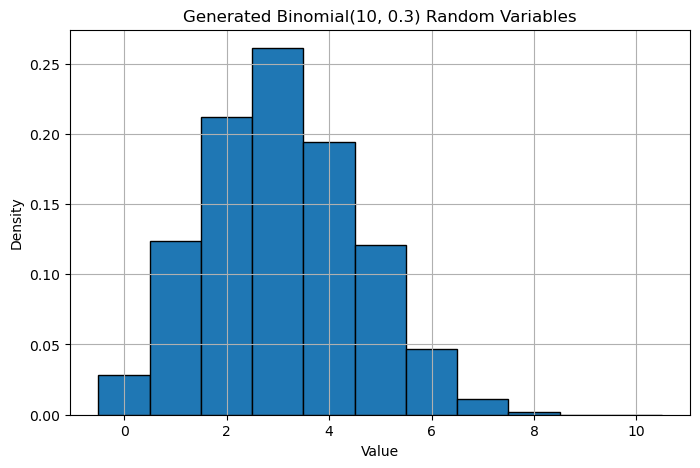

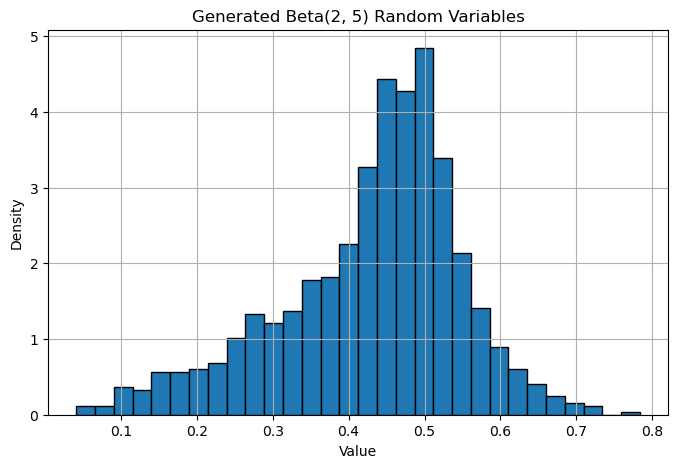

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate discrete random variables
def generate_discrete_random_variable(cumulative_probs, size=1):
    """
    Generate discrete random variables based on cumulative probabilities.
    
    Args:
        cumulative_probs (list): A list of cumulative probabilities.
        size (int): Number of samples to generate.

    Returns:
        numpy.ndarray: Array of generated random variables.
    """
    u = np.random.uniform(0, 1, size)
    results = np.searchsorted(cumulative_probs, u)
    return results

# Function to generate Beta random variables
def generate_beta_random_variable(a, b, size=1):
    """
    Generate Beta(a, b) random variables using Jöhnk's theorem.

    Args:
        a (float): First shape parameter of the Beta distribution.
        b (float): Second shape parameter of the Beta distribution.
        size (int): Number of samples to generate.

    Returns:
        numpy.ndarray: Array of Beta random variables.
    """
    u = np.random.uniform(0, 1, size)
    v = np.random.uniform(0, 1, size)
    beta_samples = (u**(1/a)) / (u**(1/a) + v**(1/b))
    return beta_samples

# Main script
if __name__ == "__main__":
    # Example 1: Generate Discrete Random Variables (Binomial(10, 0.3))
    binom_cum_probs = [0.028, 0.149, 0.382, 0.645, 0.836, 0.945, 0.987, 0.998, 1.0]
    discrete_samples = generate_discrete_random_variable(binom_cum_probs, size=1000)

    # Plot histogram for Discrete Random Variables
    plt.figure(figsize=(8, 5))
    plt.hist(discrete_samples, bins=np.arange(-0.5, 11), edgecolor='k', density=True)
    plt.title("Generated Binomial(10, 0.3) Random Variables")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

    # Example 2: Generate Beta Random Variables (Beta(2, 5))
    beta_samples = generate_beta_random_variable(a=2, b=5, size=1000)

    # Plot histogram for Beta Random Variables
    plt.figure(figsize=(8, 5))
    plt.hist(beta_samples, bins=30, edgecolor='k', density=True)
    plt.title("Generated Beta(2, 5) Random Variables")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()


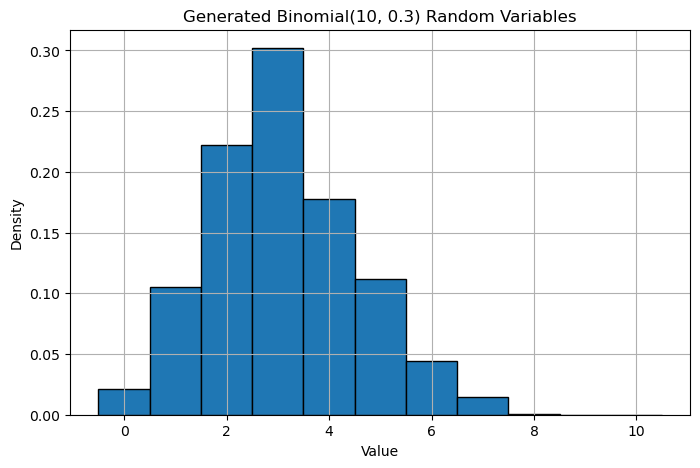

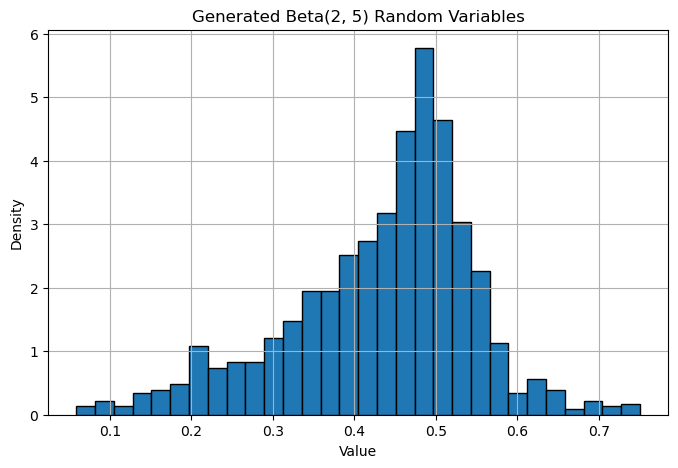

In [11]:
import random
import math
import matplotlib.pyplot as plt

# Function to generate discrete random variables
def generate_discrete_random_variable(cumulative_probs, size=1):
    """
    Generate discrete random variables based on cumulative probabilities.

    Args:
        cumulative_probs (list): A list of cumulative probabilities.
        size (int): Number of samples to generate.

    Returns:
        list: List of generated random variables.
    """
    results = []
    for _ in range(size):
        u = random.uniform(0, 1)
        for i, cp in enumerate(cumulative_probs):
            if u < cp:
                results.append(i)
                break
    return results

# Function to generate Beta random variables
def generate_beta_random_variable(a, b, size=1):
    """
    Generate Beta(a, b) random variables using Jöhnk's theorem.

    Args:
        a (float): First shape parameter of the Beta distribution.
        b (float): Second shape parameter of the Beta distribution.
        size (int): Number of samples to generate.

    Returns:
        list: List of Beta random variables.
    """
    beta_samples = []
    for _ in range(size):
        u = random.uniform(0, 1)
        v = random.uniform(0, 1)
        beta_sample = (u**(1 / a)) / ((u**(1 / a)) + (v**(1 / b)))
        beta_samples.append(beta_sample)
    return beta_samples

# Main script
if __name__ == "__main__":
    # Example 1: Generate Discrete Random Variables (Binomial(10, 0.3))
    binom_cum_probs = [0.028, 0.149, 0.382, 0.645, 0.836, 0.945, 0.987, 0.998, 1.0]
    discrete_samples = generate_discrete_random_variable(binom_cum_probs, size=1000)

    # Plot histogram for Discrete Random Variables
    plt.figure(figsize=(8, 5))
    plt.hist(discrete_samples, bins=range(12), edgecolor='k', density=True, align='left')
    plt.title("Generated Binomial(10, 0.3) Random Variables")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

    # Example 2: Generate Beta Random Variables (Beta(2, 5))
    beta_samples = generate_beta_random_variable(a=2, b=5, size=1000)

    # Plot histogram for Beta Random Variables
    plt.figure(figsize=(8, 5))
    plt.hist(beta_samples, bins=30, edgecolor='k', density=True)
    plt.title("Generated Beta(2, 5) Random Variables")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()


### Conditional Beta and Gamma Generation

#### Conditional Beta Distribution
The Beta random variable generation from Jöhnk's algorithm can fail for large $a$ and $\beta$ due to the low acceptance probability of pairs $(U, V)$ satisfying $U^{1/a} + V^{1/\beta} \leq 1$. The acceptance probability decreases rapidly as $a$ increases, as illustrated in the figure below:

$$
\text{Figure 2.2: Probability of accepting a pair } (U, V) \text{ in Jöhnk's (1964) algorithm as a function of } a, \text{ when } a = \beta.
$$

#### Example 2.12: Gamma Distribution Generation
Given a Beta random variable generator, we can derive a Gamma random variable generator as follows:

1. **Using Beta to Generate Gamma:**
   If $Y \sim \text{Be}(a, 1-a)$ and $Z \sim \text{Exp}(1)$, then
   $$
   X = YZ \sim \text{Ga}(a, 1).
   $$
   This can be shown by transforming $(Y, Z)$ into $(x = yz, w = z)$ and integrating the joint density:
   $$
   f(x) = \int_0^\infty \frac{1}{\Gamma(a)} x^{a-1} e^{-w} w^{-a} dw.
   $$

2. **Alternative for $a < 1$:**
   For a more efficient generator when $a < 1$, start with $Y \sim \text{Ga}(a+1, 1)$ and $U \sim \text{U}[0,1]$ (independent). Then:
   $$
   X = Y U^{1/a} \sim \text{Ga}(a, 1).
   $$
   This follows because:
   $$
   f(x) \propto x^{a-1} e^{-x}, \quad \text{where } x \geq 0.
   $$

#### Mixture Representations
The representation of a probability density as in the Gamma case above (2.3) is a special case of a mixture distribution:
$$
f(x) = \int g(x | w) h(w) dw,
$$
where $g(x | w)$ is the conditional density of $x$ given $w$, and $h(w)$ is the density of $(w$. Mixture representations induce efficient simulation methods and connect to advanced techniques in Chapters 9 and 10.

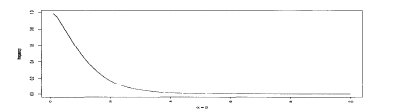


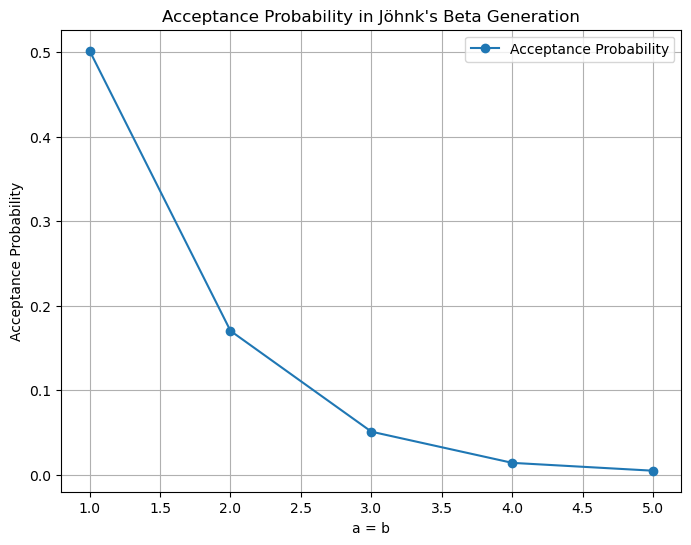

ValueError: This implementation supports only a < 1.

In [12]:
import math
import random
import matplotlib.pyplot as plt

# Function to generate Beta(a, b) random variable using Jöhnk's algorithm
def beta_random_variable(a, b):
    while True:
        U = random.uniform(0, 1)
        V = random.uniform(0, 1)
        if U**(1/a) + V**(1/b) <= 1:
            return U**(1/a)

# Function to calculate acceptance probability for Beta(a, b)
def beta_acceptance_probability(a, b, trials=10000):
    accepted = 0
    for _ in range(trials):
        U = random.uniform(0, 1)
        V = random.uniform(0, 1)
        if U**(1/a) + V**(1/b) <= 1:
            accepted += 1
    return accepted / trials

# Function to generate Gamma(a, 1) random variable for a < 1
def gamma_random_variable(a):
    if a < 1:
        # Using the alternative method for a < 1
        y = gamma_random_variable(a + 1)
        U = random.uniform(0, 1)
        return y * U**(1/a)
    else:
        raise ValueError("This implementation supports only a < 1.")

# Plot the acceptance probability of Beta generation for different values of a
def plot_beta_acceptance():
    a_values = [1, 2, 3, 4, 5]
    acceptance_probs = [beta_acceptance_probability(a, a) for a in a_values]

    plt.figure(figsize=(8, 6))
    plt.plot(a_values, acceptance_probs, marker='o', label="Acceptance Probability")
    plt.xlabel("a = b")
    plt.ylabel("Acceptance Probability")
    plt.title("Acceptance Probability in Jöhnk's Beta Generation")
    plt.grid(True)
    plt.legend()
    plt.show()

# Generate and plot Gamma random variables
def plot_gamma_samples(a, n_samples=1000):
    samples = [gamma_random_variable(a) for _ in range(n_samples)]
    plt.figure(figsize=(8, 6))
    plt.hist(samples, bins=30, density=True, alpha=0.7, color='blue', label=f"Gamma({a}, 1)")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.title(f"Histogram of Gamma({a}, 1) Random Variables")
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Plot Beta acceptance probability
    plot_beta_acceptance()

    # Plot Gamma samples for a < 1
    plot_gamma_samples(0.5)


### Example . Student's t Generation

A useful form of equation (2.5) is:

$$
f(x) = \int g(x, y) \, dy = \int h_1(z | y) h_2(u) \, dy,
$$

where $ h_1 $ and $ h_2 $ are the conditional and marginal densities of $ X | Y = y $ and $ Y $, respectively. 

For example, we can write Student's t density with degrees of freedom $ \nu $ in this form, where:

$$
X | Y \sim N(0, \nu/Y) \quad \text{and} \quad Y \sim \chi^2.
$$

Such a representation is also useful for discrete distributions. For instance, in **Example 2.9**, we noted an alternate representation for the negative binomial distribution. If $ X \sim \text{Neg}(n, p) $, then:

$$
P(X) = \int g(x, y) \, dy,
$$

with:

$$
X | Y \sim \text{Py}(y) \quad \text{and} \quad Y \sim \text{Gamma}(n, \theta),
$$

where $ \theta = \frac{1-p}{p} $. 

Note that the discreteness of the negative binomial distribution does not result in a discrete mixture representation of the probability. The mixture is continuous, as the distribution of $ Y $ is continuous.

---

### Example . Noncentral Chi-Squared Generation

The noncentral chi-squared distribution, $ \chi^2(\lambda) $, can also be represented as a mixture, as it can be written as a sum of central chi-squared densities. It is of the form:

$$
\chi^2(\lambda) = \int h_1(z) h_2(y) \, dy,
$$

where $ h_1 $ is the density of a $ \chi^2 $ distribution and $ h_2 $ is the density of a distribution with parameters $ \frac{\lambda}{2} $.

However, this mixture representation is not as efficient as the algorithm obtained by generating $ Z \sim \chi^2(k-1) $ and $ Y \sim N(\sqrt{\lambda}, 1) $, and using the fact that:

$$
Z + Y^2 \sim \chi^2(\lambda).
$$

Note that the noncentral chi-squared distribution does not have an explicit form for its density function. It is either represented as an infinite mixture or by using modified Bessel functions.


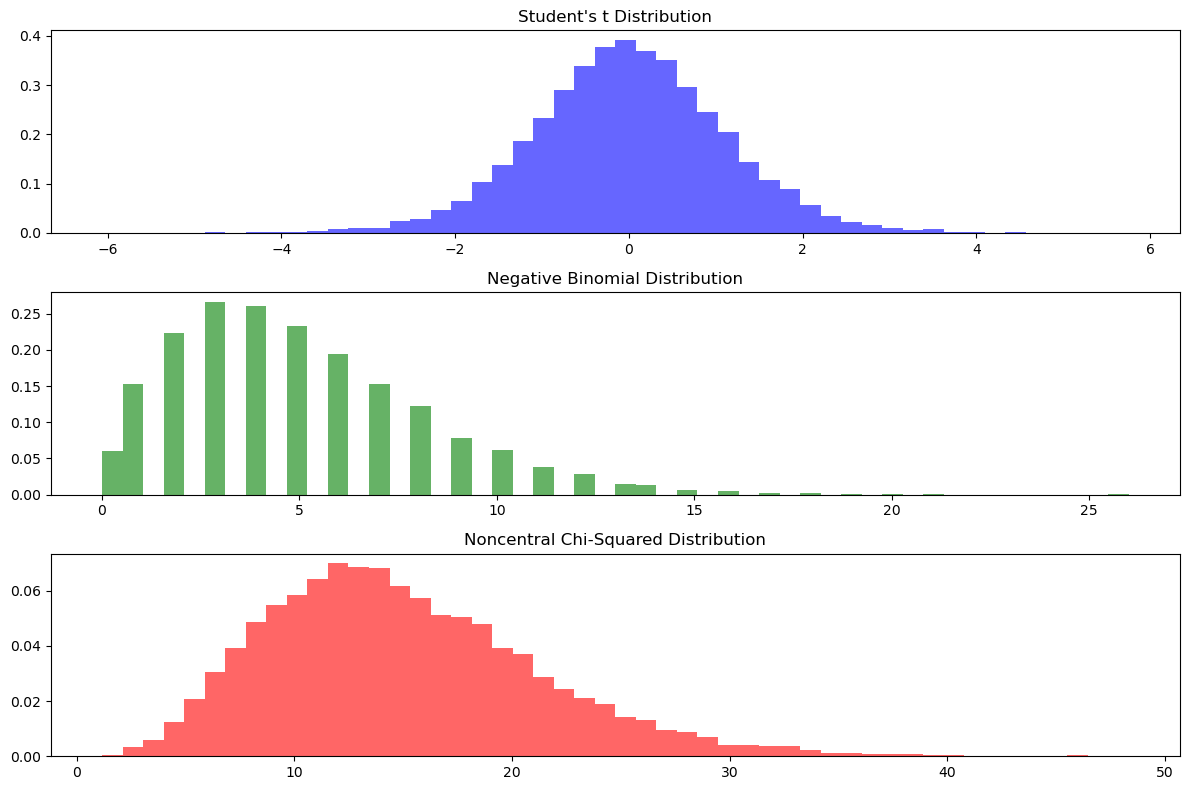

In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Example 2.13 - Student's t generation
def student_t_generation(nu, size=10000):
    # Generate Y from chi-squared distribution
    Y = np.random.chisquare(df=nu, size=size)
    # Generate X from normal distribution with mean 0 and variance 1/Y
    X = np.random.normal(loc=0, scale=np.sqrt(nu/Y), size=size)
    return X

# Example 2.9 - Negative Binomial generation
def negative_binomial_generation(n, p, size=10000):
    # Generate Y from Gamma distribution
    Y = np.random.gamma(shape=n, scale=(1-p)/p, size=size)
    # Generate X from Negative Binomial using Y as the mean
    X = np.random.poisson(lam=Y, size=size)
    return X

# Example 2.14 - Noncentral Chi-Squared generation
def noncentral_chi_squared_generation(df, nc, size=10000):
    # Generate Z from chi-squared distribution (df degrees of freedom)
    Z = np.random.chisquare(df=df-1, size=size)
    # Generate Y from normal distribution (mean sqrt(nc) and variance 1)
    Y = np.random.normal(loc=np.sqrt(nc), scale=1, size=size)
    # X is the sum of Z and Y squared
    X = Z + Y**2
    return X

# Parameters for the distributions
nu = 10  # Degrees of freedom for Student's t
n = 5    # Number of trials for Negative Binomial
p = 0.5  # Probability of success for Negative Binomial
df = 10  # Degrees of freedom for Chi-Squared
nc = 5   # Noncentrality parameter for Noncentral Chi-Squared

# Generate random variables from the distributions
X_student_t = student_t_generation(nu)
X_negative_binomial = negative_binomial_generation(n, p)
X_noncentral_chi_squared = noncentral_chi_squared_generation(df, nc)

# Plot the results
plt.figure(figsize=(12, 8))

# Plot Student's t distribution
plt.subplot(3, 1, 1)
plt.hist(X_student_t, bins=50, density=True, alpha=0.6, color='b')
plt.title("Student's t Distribution")

# Plot Negative Binomial distribution
plt.subplot(3, 1, 2)
plt.hist(X_negative_binomial, bins=50, density=True, alpha=0.6, color='g')
plt.title("Negative Binomial Distribution")

# Plot Noncentral Chi-Squared distribution
plt.subplot(3, 1, 3)
plt.hist(X_noncentral_chi_squared, bins=50, density=True, alpha=0.6, color='r')
plt.title("Noncentral Chi-Squared Distribution")

plt.tight_layout()
plt.show()


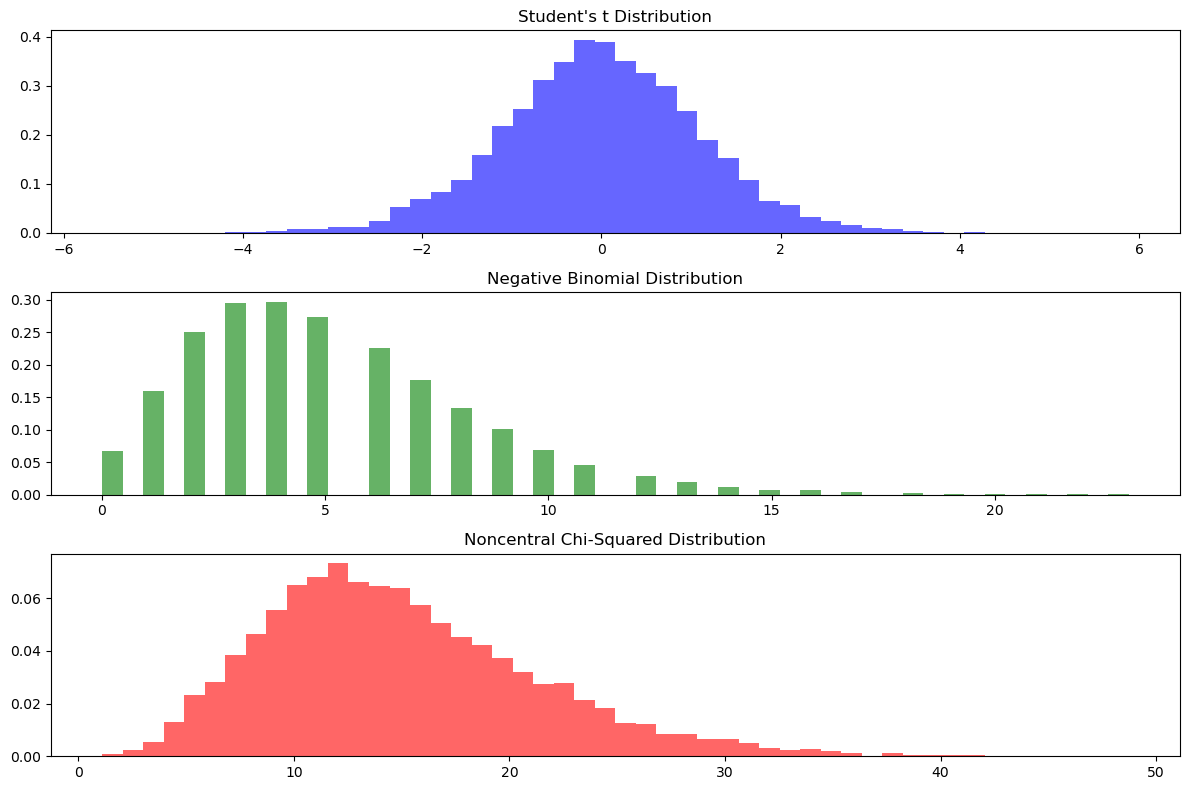

In [14]:
import random
import scipy.stats as stats
import matplotlib.pyplot as plt

# Example 2.13 - Student's t generation
def student_t_generation(nu, size=10000):
    X = []
    for _ in range(size):
        # Generate Y from chi-squared distribution
        Y = stats.chi2.rvs(df=nu)
        # Generate X from normal distribution with mean 0 and variance 1/Y
        X.append(random.gauss(0, (nu / Y) ** 0.5))
    return X

# Example 2.9 - Negative Binomial generation
def negative_binomial_generation(n, p, size=10000):
    X = []
    for _ in range(size):
        # Generate Y from Gamma distribution
        Y = stats.gamma.rvs(a=n, scale=(1-p)/p)
        # Generate X from Poisson distribution with mean Y
        X.append(stats.poisson.rvs(mu=Y))
    return X

# Example 2.14 - Noncentral Chi-Squared generation
def noncentral_chi_squared_generation(df, nc, size=10000):
    X = []
    for _ in range(size):
        # Generate Z from chi-squared distribution (df degrees of freedom)
        Z = stats.chi2.rvs(df=df-1)
        # Generate Y from normal distribution (mean sqrt(nc) and variance 1)
        Y = random.gauss(nc ** 0.5, 1)
        # X is the sum of Z and Y squared
        X.append(Z + Y ** 2)
    return X

# Parameters for the distributions
nu = 10  # Degrees of freedom for Student's t
n = 5    # Number of trials for Negative Binomial
p = 0.5  # Probability of success for Negative Binomial
df = 10  # Degrees of freedom for Chi-Squared
nc = 5   # Noncentrality parameter for Noncentral Chi-Squared

# Generate random variables from the distributions
X_student_t = student_t_generation(nu)
X_negative_binomial = negative_binomial_generation(n, p)
X_noncentral_chi_squared = noncentral_chi_squared_generation(df, nc)

# Plot the results
plt.figure(figsize=(12, 8))

# Plot Student's t distribution
plt.subplot(3, 1, 1)
plt.hist(X_student_t, bins=50, density=True, alpha=0.6, color='b')
plt.title("Student's t Distribution")

# Plot Negative Binomial distribution
plt.subplot(3, 1, 2)
plt.hist(X_negative_binomial, bins=50, density=True, alpha=0.6, color='g')
plt.title("Negative Binomial Distribution")

# Plot Noncentral Chi-Squared distribution
plt.subplot(3, 1, 3)
plt.hist(X_noncentral_chi_squared, bins=50, density=True, alpha=0.6, color='r')
plt.title("Noncentral Chi-Squared Distribution")

plt.tight_layout()
plt.show()


###  Accept-Reject Methods

There are many distributions from which it is difficult, or even impossible, to directly simulate by an inverse transform. Moreover, in some cases, we are not even able to represent the distribution in a usable form, such as a transformation or a mixture. In such settings, it is impossible to exploit direct probabilistic properties to derive a simulation method. We thus turn to another class of methods that only requires us to know the functional form of the density $ f $ of interest up to a multiplicative constant; no deep analytical study of $ f $ is necessary. The key to this method is to use a simpler (simulation-wise) density $ g $ from which the simulation is actually done. For a given density $ g $ — called the **instrumental density** — there are thus many densities $ f $ — called the **target densities** — which can be simulated this way. The corresponding algorithm, called **Accept-Reject**, is based on a simple connection with the uniform distribution, discussed below.

####  The Fundamental Theorem of Simulation

There exists a fundamental (simple!) idea that underlies the Accept-Reject methodology, and also plays a key role in the construction of the slice sampler (Chapter 8). If $ f $ is the density of interest, on an arbitrary space, we can write:

$$
f(x) \, dx.
$$

Thus, $ f $ appears as the marginal density (in $ X $) of the joint distribution:

$$
(X, U) \sim U \{ (x, u) : 0 < u < f(x) \}.
$$

Since $ U $ is not directly related to the original problem, it is called an **auxiliary variable**, a notion to be found again in later chapters like Chapters 8-10. 

Although it seems like we have not gained much, the introduction of the auxiliary uniform variable in equation (2.7) has brought a considerably different perspective. Since equation (2.8) is the joint density of $ X $ and $ U $, we can generate from this joint distribution by just generating uniform random variables on the constrained set:

$$
\{ (x, u) : 0 < u < f(x) \}.
$$

Moreover, since the marginal distribution of $ X $ is the original target distribution, $ f $, by generating a uniform variable on $ \{ (x, u) : 0 < u < f(x) \} $, we have generated a random variable from $ f $. And this generation was produced without using $ f $ other than through the calculation of $ f(x) $!

The importance of this equivalence is stressed in the following theorem:

#### Theorem 2.15 (Fundamental Theorem of Simulation)
Simulating $ X \sim f(x) $ is equivalent to simulating $ (X, U) \sim U \{ (x, u) : 0 < u < f(x) \} $.


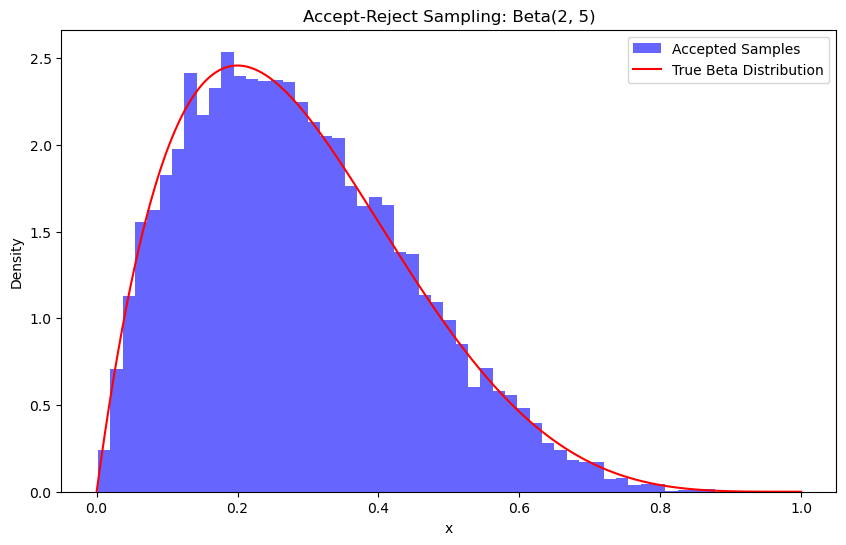

In [15]:
import random
import scipy.stats as stats
import matplotlib.pyplot as plt

# Accept-Reject sampling for Beta distribution
def accept_reject_beta(alpha, beta, M, size=10000):
    accepted_samples = []
    
    while len(accepted_samples) < size:
        # Generate a sample from the instrumental density g(x) ~ Uniform(0, 1)
        x = random.uniform(0, 1)
        
        # Generate a uniform random variable u from U(0, 1)
        u = random.uniform(0, 1)
        
        # Accept the sample if u <= f(x) / (M * g(x))
        # f(x) = Beta distribution, g(x) = Uniform distribution (constant density = 1)
        f_x = stats.beta.pdf(x, alpha, beta)  # Target Beta distribution density
        g_x = 1  # Uniform distribution density is 1
        if u <= f_x / (M * g_x):
            accepted_samples.append(x)
    
    return accepted_samples

# Parameters for Beta distribution
alpha = 2  # Shape parameter for Beta distribution
beta = 5   # Shape parameter for Beta distribution
M = 3      # M is a constant such that f(x) <= M * g(x) for all x

# Generate samples using Accept-Reject method
samples = accept_reject_beta(alpha, beta, M)

# Plot the results
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='b', label='Accepted Samples')
x = [i / 1000 for i in range(1001)]
plt.plot(x, stats.beta.pdf(x, alpha, beta), 'r-', label='True Beta Distribution')
plt.title(f"Accept-Reject Sampling: Beta({alpha}, {beta})")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()
